#Jonathan Halverson
#January 17, 2016

### Here we work through a classic statistics problem of determining whether a coin is fair. For instance, if a coin came up heads 77 times on 100 flips would we conclude it was fair? We begin with a numerical experiment and then present the analytical solution.

###For the numerical experiment we flip a fair coin 100 times for 1000 trials and record the number of heads for each trial. 

In [2]:
import random

trials = 1000
flips = 100
heads = []
random.seed(918273645)
for _ in xrange(trials):
    ct = 0
    for _ in xrange(flips):
        if (random.choice(['heads', 'tails']) == 'heads'): ct += 1
    heads.append(ct)

###Next we create a histogram of the results (one could use plt.hist but we here we use bar) 

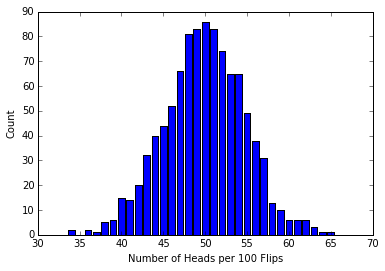

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

num_heads, counts = zip(*Counter(heads).iteritems())
plt.bar(num_heads, counts, align='center')
plt.xlabel('Number of Heads per 100 Flips')
plt.ylabel('Count')

###The experiment indicates that it is very unlikely to find 77 heads in 100 flips. In fact, 65 heads was the most seen in 1000 trials. 

###Coin flips obey the  binomial distribution because the flips are independent, the outcome is 0 or 1 with a constant probability of p, and the total number of trials is n. Next we explicitly code the binomial distribution and then use the built-in SciPy function.

In [4]:
from math import factorial
def bernoulli_success(n, k, p):
    q = 1.0 - p
    pre = factorial(n) / (factorial(n - k) * factorial(k))
    return pre * p**k * q**(n - k)

###Returning to the original question: 

In [5]:
bernoulli_success(n=100, k=77, p=0.5)

1.9615239642357197e-08

###We can use the built-in binomial distribution in SciPy 

In [6]:
from scipy.stats import binom
binom.pmf(k=77, n=flips, p=0.5)

1.9615239642356016e-08

In [7]:
bern = [binom.pmf(k, n=100, p=0.5) for k in range(0, flips + 1)]
print sum(bern) # check that the distribution is properly normalized

1.0


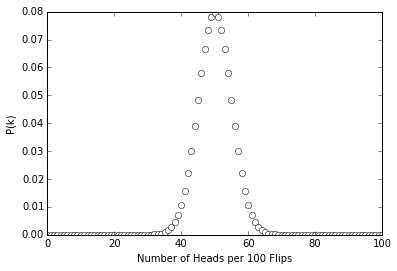

In [8]:
plt.plot(bern, 'wo')
plt.xlabel('Number of Heads per 100 Flips')
plt.ylabel('P(k)')

###One can model a binomial distribution using a normal distribution. This can done by using a mean of np and a standard distribution of  (np(1-p))^0.5. One must be careful that k is sufficiently large and np and n(1-p) are at least 10. One must also because careful when applying the approximation to narrow ranges.

###Aside: What is the probability of rolling three 6-sided dice and all three come up with the same number: 

In [9]:
success = 0
attempts = 100000
for _ in xrange(attempts):
    d1 = random.choice([1, 2, 3, 4, 5, 6])
    d2 = random.choice([1, 2, 3, 4, 5, 6])
    d3 = random.choice([1, 2, 3, 4, 5, 6])
    if (d1 == d2 and d2 == d3): success += 1
print float(success) / attempts, 1 / 6.0**2

0.02779 0.0277777777778


###We can use the binomial distribution here. Consider three trials where success is getting a certain number each time (with p=1/6):

In [15]:
binom.pmf(k=3, n=3, p=1/6.0)

0.0046296296296296285

### The above result would be valid if we had a specific number in mind like all three dice coming up 2. Since there are six different numbers or ways to achieve all three die being the same, we multiply the above by 6:

In [17]:
6 * binom.pmf(k=3, n=3, p=1/6.0)

0.027777777777777769

#A nice twist 

Your 10 against my 20 for 100 flips. Risk of losing money: (1/2300).
Expected value 50 x 20 - 50 x 10 = $500

####Two competitors flip a fair coin with one putting up 10 dollars and the other 20 dollars. Show that after 100 flips the probability of player 1 to lose money is 1/2300. And what is the probability of player 2 to make any money?

In [11]:
gains = []
for _ in range(23000):
    gain = 0
    for _ in range(100):
        if (random.choice(['heads', 'tails']) == 'heads'): gain += 20
        else: gain -= 10
    gains.append(gain)

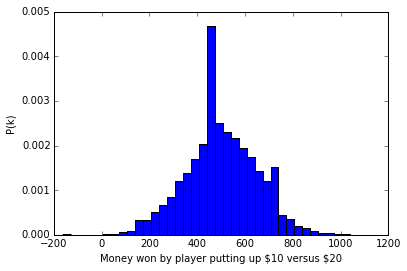

In [12]:
n, bins, patches = plt.hist(gains, bins=36, normed=True)
plt.xlabel('Money won by player putting up \$10 versus \$20')
plt.ylabel('P(k)')

In [13]:
print len([gain for gain in gains if gain < 0])

10


###The numerical experiment shows that in 10 out of 23000 trials the person putting up 20 dollars versus 10 per flip (100 in total) wins money.  